In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from discrete import *
import ot
import matplotlib.patches as patches

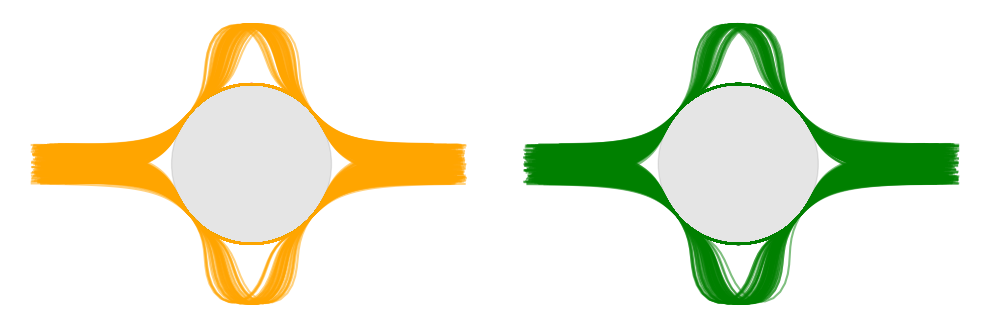

In [14]:


# Loading training trajectories
all_points1 = []    # want modes 1, 2, 4, 6
all_points2 = []    # want modes 1, 2, 3, 5
with open('data/trajs_noise1.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        x1, y1 = float(row[4]), float(row[5])ß
        x2, y2 = float(row[7]), float(row[8])
        all_points1.append([x1, y1])
        all_points2.append([x2, y2])

num_trajectories = 1000
points_per_trajectory = 100

expert_data1 = [
    all_points1[i * points_per_trajectory:(i + 1) * points_per_trajectory]
    for i in range(num_trajectories)
]
first_trajectory1 = expert_data1[0]
x1 = [point[0] for point in first_trajectory1]
y1 = [point[1] for point in first_trajectory1]

expert_data2 = [
    all_points2[i * points_per_trajectory:(i + 1) * points_per_trajectory]
    for i in range(num_trajectories)
]
first_trajectory2 = expert_data2[0]
x2 = [point[0] for point in first_trajectory2]
y2 = [point[1] for point in first_trajectory2]

expert_data1 = np.array(expert_data1)
expert_data2 = np.array(expert_data2)

n_traj = 500

# ranodmly select 10 trajectories from the expert data
indices = np.random.choice(num_trajectories, size=n_traj, replace=False)
expert_data1 = expert_data1[indices]
expert_data2 = expert_data2[indices]

# Plotting the trajectories
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# plt.title("Expert Trajectories 1")
plt.axis("off")
for trajectory in expert_data1:
    plt.plot([point[0] for point in trajectory], [point[1] for point in trajectory], alpha=0.5, color='orange')

# draw circle
circle = plt.Circle((10, 0), 4, color='gray', fill=True, alpha=0.2)
plt.gca().add_patch(circle)
# plt.scatter(x1, y1, color='red', label='First Trajectory')
# plt.legend()
# set aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')
plt.subplot(1, 2, 2)
# plt.title("Expert Trajectories 2")
plt.axis("off")
for trajectory in expert_data2:
    plt.plot([point[0] for point in trajectory], [point[1] for point in trajectory], alpha=0.5, color='green')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

# draw circle
circle = plt.Circle((10, 0), 4, color='gray', fill=True, alpha=0.2)
plt.gca().add_patch(circle)

plt.gca().set_aspect('equal', adjustable='box')
# plt.legend()
plt.tight_layout()

# plt.savefig('')

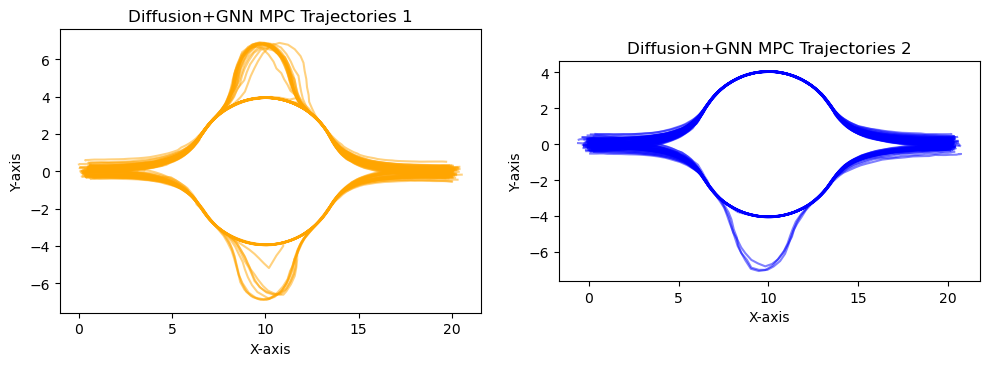

In [16]:
n_traj = 100

load_path = 'data/mpc_H_25_I_5'

diffusion_gnn_data1 = []
diffusion_gnn_data2 = []

for i in range(n_traj):
    diffusion_gnn_data1.append(np.loadtxt(os.path.join(load_path, f'diffusion_gnn_noise_0_2_planned_traj1_{i}.csv'), delimiter=','))
    diffusion_gnn_data2.append(np.loadtxt(os.path.join(load_path, f'diffusion_gnn_noise_0_2_planned_traj2_{i}.csv'), delimiter=','))

diffusion_gnn_data1 = np.array(diffusion_gnn_data1)
diffusion_gnn_data2 = np.array(diffusion_gnn_data2)

# Plotting diffision+gnn trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Diffusion+GNN MPC Trajectories 1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in diffusion_gnn_data1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(1, 2, 2)
plt.title("Diffusion+GNN MPC Trajectories 2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory   :, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in diffusion_gnn_data2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
# print("Number of collisions: ",count_collisions(diffusion_gnn_data1,diffusion_gnn_data2, 2.99))